# 0) Setting Environment

In [99]:
# Importing Basic Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Importing Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

# Importing Evaluation matrces
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.simplefilter("ignore")

# 1) Reading Dataset

In [63]:
# URL of the raw CSV file from Github Repo
csv_url = 'https://raw.githubusercontent.com/Shri-2000v/SpaceShip-Titanic-Modeling/main/data/train.csv'

# Reading the CSV file
df = pd.read_csv(csv_url)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [64]:
# Checking Info of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [65]:
# Checking Statistical Properties of Numerical features
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [66]:
# Checking Statistical Properties of Categorical features
df.describe(include="O")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


# 2) Data Analysis

## 2.1) Univariate Analysis

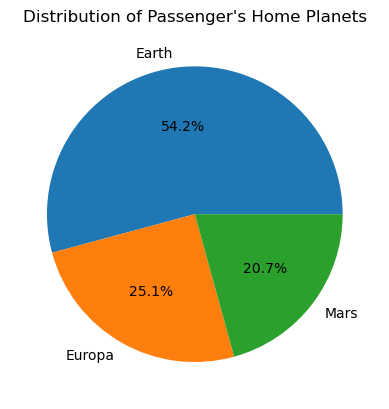

In [67]:
# Calculating Frequency
planet_counts = df['HomePlanet'].value_counts()

# Plotting HomePlanets
planet_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title("Distribution of Passenger's Home Planets")
plt.ylabel("")
plt.show()

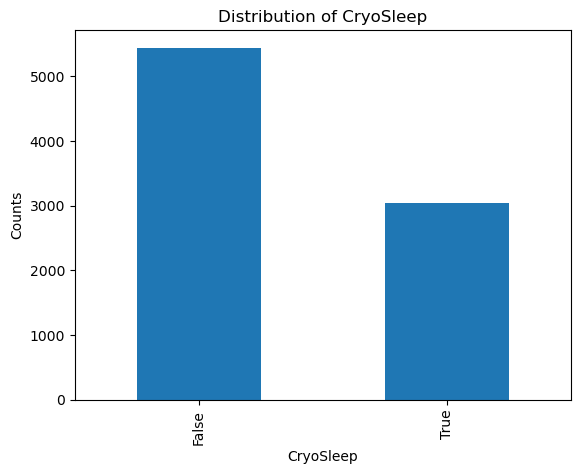

In [68]:
# Calculating Frequency
csleep_counts = df['CryoSleep'].value_counts()

# Plotting CRYOSLEEP frequency
csleep_counts.plot(kind='bar')
plt.xlabel('CryoSleep')
plt.ylabel('Counts')
plt.title('Distribution of CryoSleep')
plt.show()

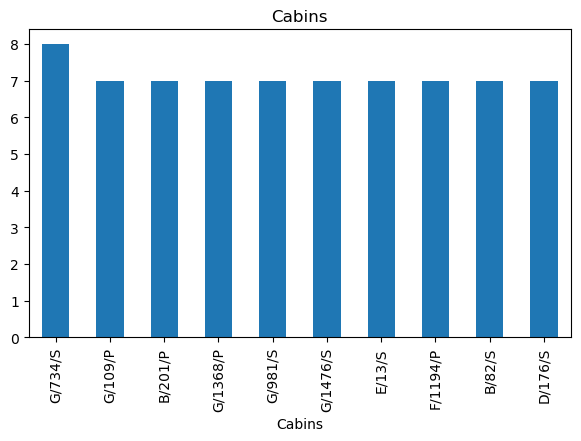

In [69]:
# Plotting first 10 Top cabins
cabin_counts = df['Cabin'].value_counts()[:10]
cabin_counts.plot(kind='bar', figsize=(7, 4))
plt.xlabel('Cabins')
plt.title('Cabins')
plt.show()

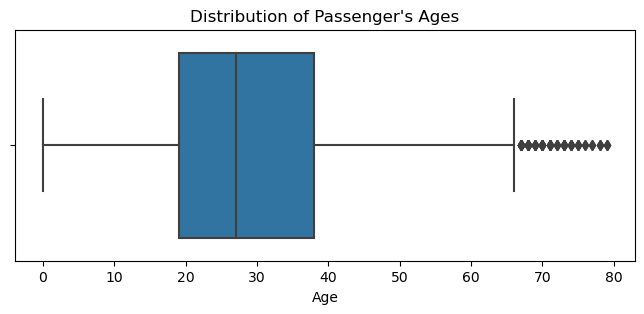

In [70]:
# plotting Age of passengers
plt.figure(figsize=(8, 3))
sns.boxplot(df.Age)
plt.xlabel('Age')
plt.title("Distribution of Passenger's Ages")
plt.show()

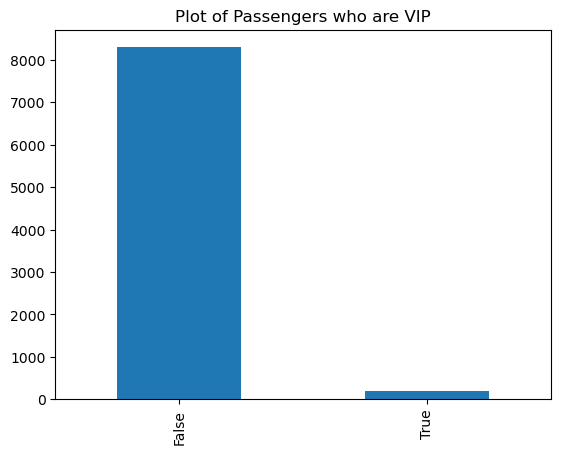

In [71]:
# Calculating Frequency
vip_counts = df['VIP'].value_counts()

# Plotting VIP Distribution
vip_counts.plot(kind='bar')
plt.title('Plot of Passengers who are VIP')
plt.ylabel('')
plt.show()

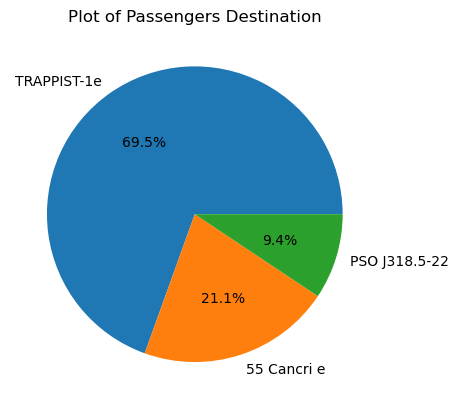

In [72]:
# Calculating Frequency
des_counts = df['Destination'].value_counts()

# Plotting Destination destribution
des_counts.plot(kind='pie',autopct='%1.1f%%')
plt.plot(des_counts)
plt.title('Plot of Passengers Destination')
plt.ylabel("")
plt.show()

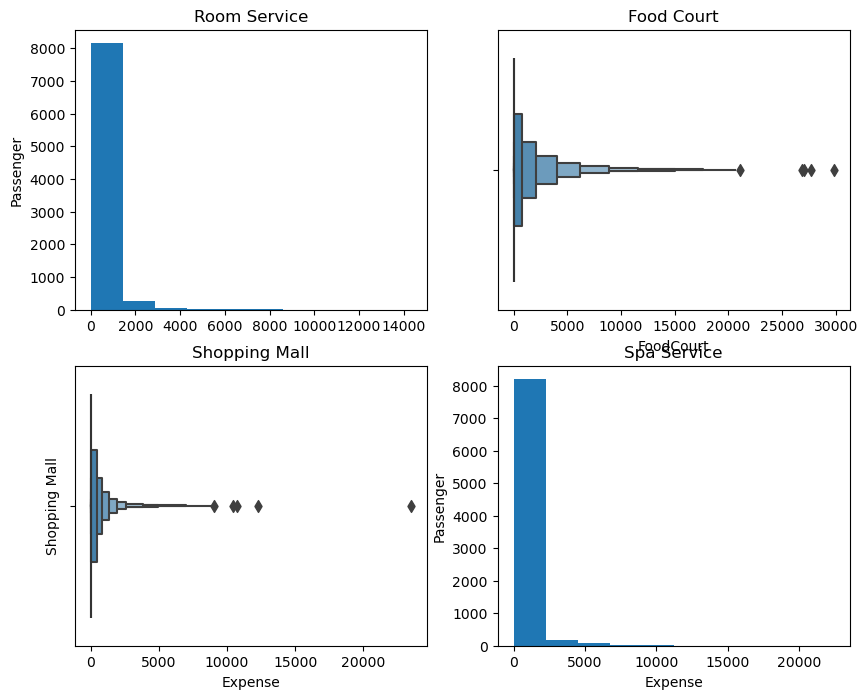

In [73]:
# Plotting Histogrms
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
df.RoomService.plot(kind="hist")
plt.title("Room Service")
plt.ylabel('Passenger')

plt.subplot(2,2,2)
sns.boxenplot(df.FoodCourt)
plt.title("Food Court")

plt.subplot(2,2,3)
sns.boxenplot(df.ShoppingMall)
plt.title("Shopping Mall")
plt.xlabel("Expense")
plt.ylabel("Shopping Mall")

plt.subplot(2,2,4)
df.Spa.plot(kind="hist")
plt.title("Spa Service")
plt.xlabel('Expense')
plt.ylabel('Passenger')
plt.show()

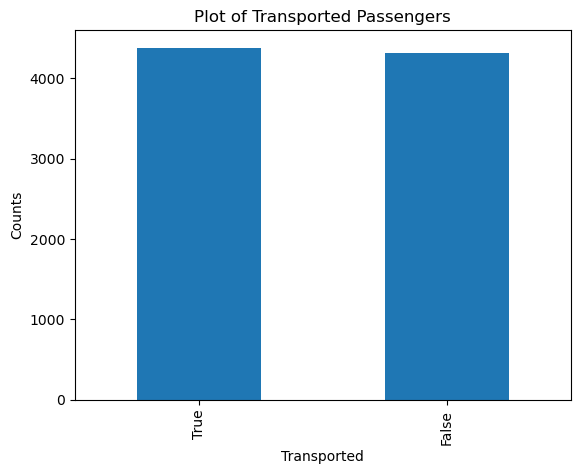

In [74]:
# Calculating Frequency
csleep_counts = df['Transported'].value_counts()

# Plotting Transported frequency
csleep_counts.plot(kind='bar')
plt.xlabel('Transported')
plt.ylabel('Counts')
plt.title('Plot of Transported Passengers')
plt.show()

## 2.2) Bivariate Analysis

In [75]:
def analyze_passenger_data(feature_name, target_name="Transported", target_value=True):

    # Random colormap for the graph visualization
    colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
    rand_colormap = np.random.choice(colormaps)

    # Crosstab and plot it as a bar chart
    transport_crosstab = pd.crosstab(df[feature_name], df[target_name])
    transport_crosstab.plot(kind="bar", colormap=rand_colormap, figsize=(10, 4))
    plt.show()

    # Calculating the percentage of passengers transported for each category of the feature
    transported_rate = df.groupby(feature_name).apply(lambda x: 100 * np.mean(x[target_name] == target_value)).sort_values(ascending=False)
    
    # Displaying the top 3 categories with the highest transportation rates
    for category, rate in transported_rate.head(3).items():
        print(f"Transportation rate for {category} in {feature_name}: {rate:.2f}%")

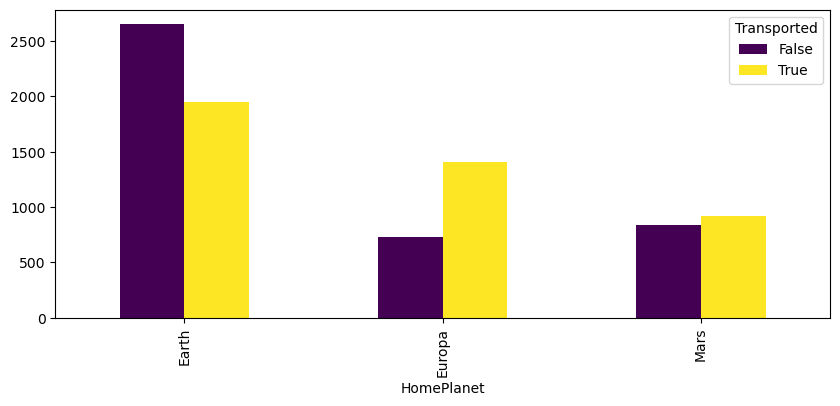

Transportation rate for Europa in HomePlanet: 65.88%
Transportation rate for Mars in HomePlanet: 52.30%
Transportation rate for Earth in HomePlanet: 42.39%


In [76]:
analyze_passenger_data(feature_name="HomePlanet")

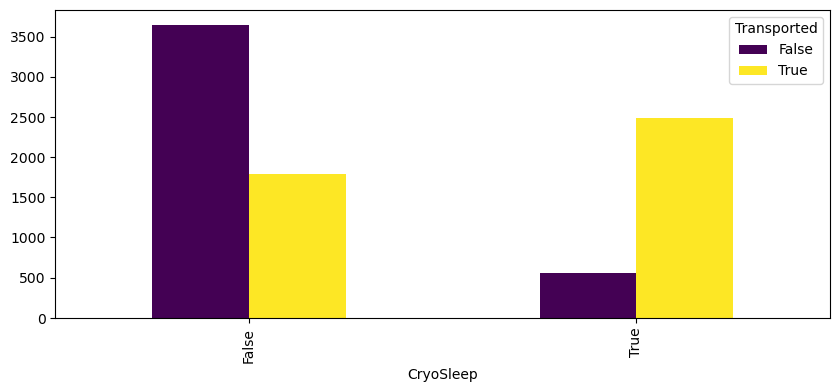

Transportation rate for True in CryoSleep: 81.76%
Transportation rate for False in CryoSleep: 32.89%


In [77]:
analyze_passenger_data(feature_name="CryoSleep")

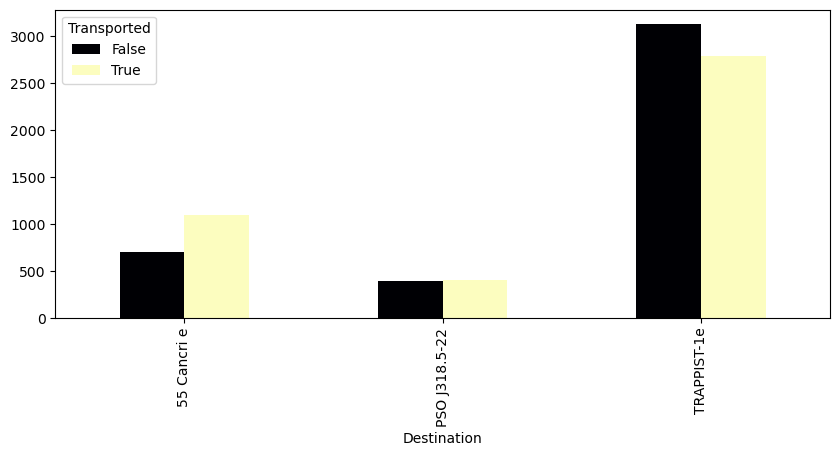

Transportation rate for 55 Cancri e in Destination: 61.00%
Transportation rate for PSO J318.5-22 in Destination: 50.38%
Transportation rate for TRAPPIST-1e in Destination: 47.12%


In [78]:
analyze_passenger_data(feature_name="Destination")

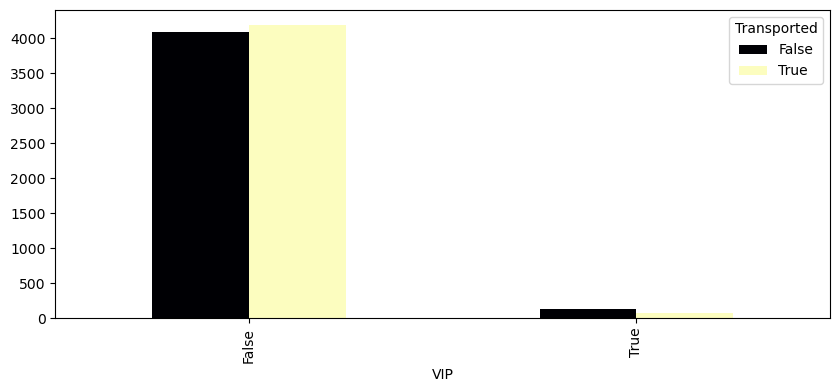

Transportation rate for False in VIP: 50.63%
Transportation rate for True in VIP: 38.19%


In [79]:
analyze_passenger_data(feature_name="VIP")

In [80]:
def explore_continuous_feature(feature_name, target_name="Transported", df=df):
    # Summary statistics
    print(f"Exploring {feature_name.upper()}...")
    print(df[feature_name].describe().drop(['count', '25%', '50%', '75%']))
    print(f"Mode of {feature_name}: {df[feature_name].mode()[0]}")
    
    # Correlation with the target
    corr = df[[feature_name, target_name]].corr().iloc[0, 1]
    print(f"Correlation with {target_name}: {corr:.3f}")
    
    # Ratios of target condition for above and below mean values
    above_mean = df[df[feature_name] > df[feature_name].mean()]
    below_mean = df[df[feature_name] < df[feature_name].mean()]
    above_ratio = above_mean[target_name].mean()
    below_ratio = below_mean[target_name].mean()
    print(f"Transportation Rate for Passengers Whose {feature_name} is ABOVE the Average Age of Passengers: {above_ratio:.3f}")
    print(f"Transportation Rate for Passengers Whose {feature_name} is BELOW the Average Age of Passengers: {below_ratio:.3f}")

    # Visualization
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.kdeplot(df[feature_name], hue=df[target_name], shade=True)
    plt.title("Density Plot")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[feature_name], hue=df[target_name])
    plt.title("Box Plot")
    plt.tight_layout()
    plt.show()

Exploring AGE...
mean    28.827930
std     14.489021
min      0.000000
max     79.000000
Name: Age, dtype: float64
Mode of Age: 24.0
Correlation with Transported: -0.075
Transportation Rate for Passengers Whose Age is ABOVE the Average Age of Passengers: 0.479
Transportation Rate for Passengers Whose Age is BELOW the Average Age of Passengers: 0.523


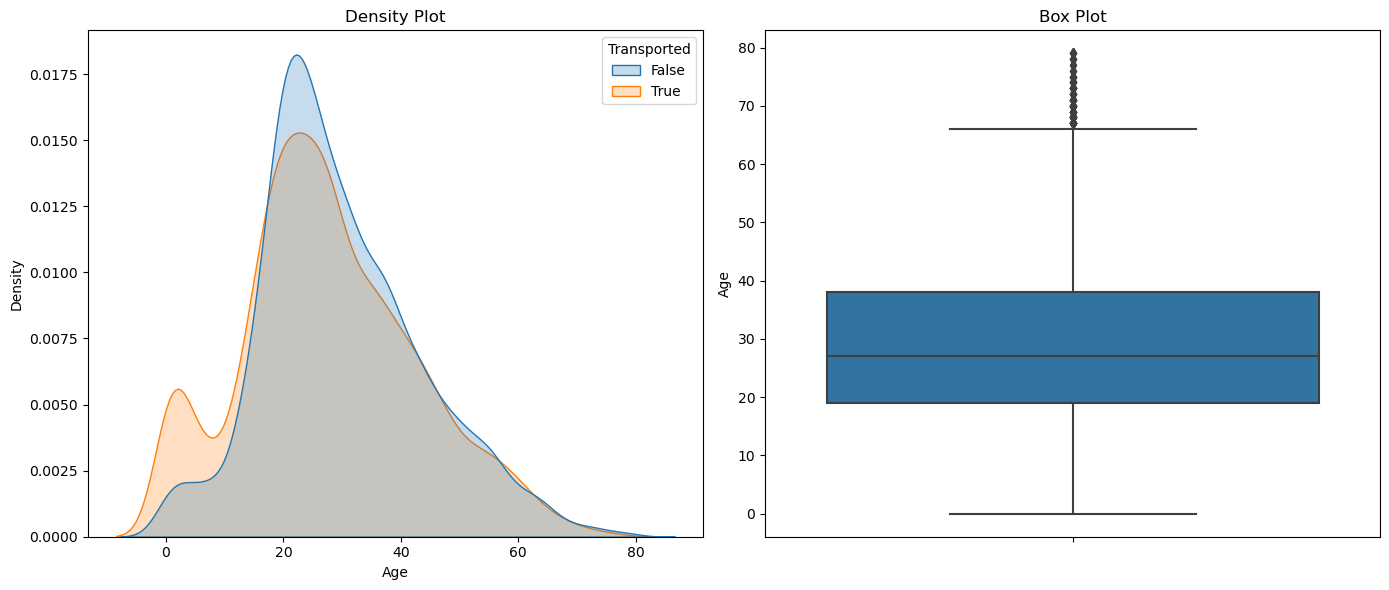

In [81]:
explore_continuous_feature("Age")

Exploring ROOMSERVICE...
mean      224.687617
std       666.717663
min         0.000000
max     14327.000000
Name: RoomService, dtype: float64
Mode of RoomService: 0.0
Correlation with Transported: -0.245
Transportation Rate for Passengers Whose RoomService is ABOVE the Average Age of Passengers: 0.181
Transportation Rate for Passengers Whose RoomService is BELOW the Average Age of Passengers: 0.580


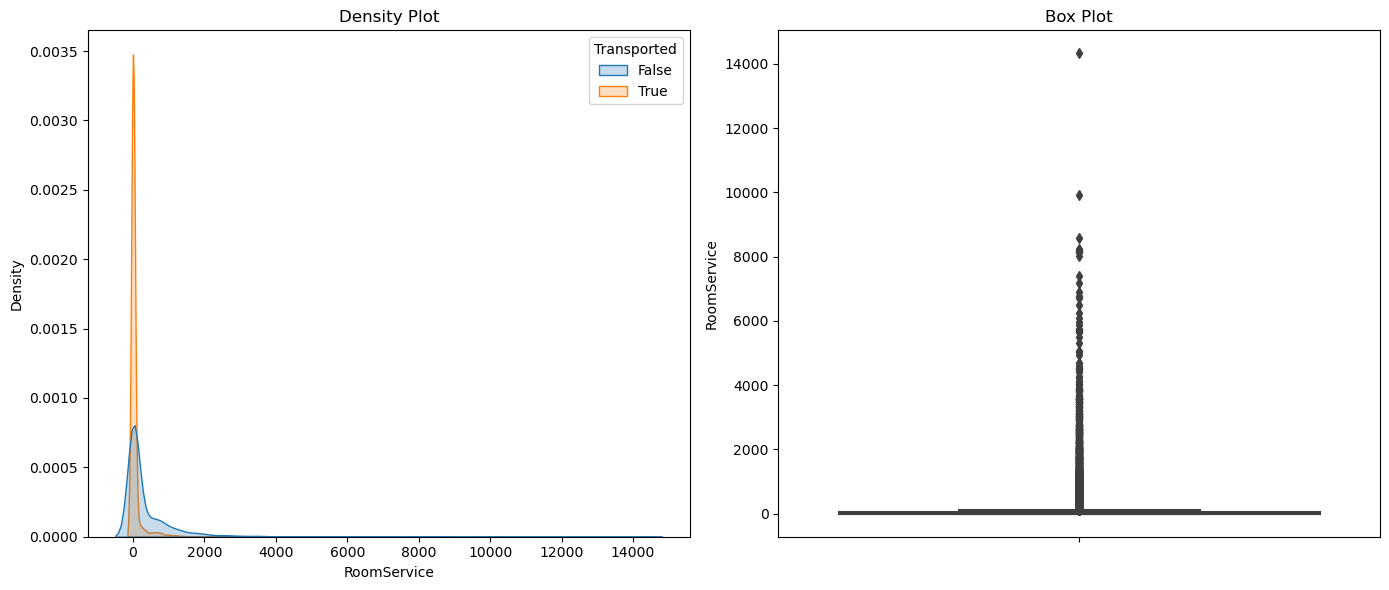

In [82]:
explore_continuous_feature("RoomService")

Exploring FOODCOURT...
mean      458.077203
std      1611.489240
min         0.000000
max     29813.000000
Name: FoodCourt, dtype: float64
Mode of FoodCourt: 0.0
Correlation with Transported: 0.047
Transportation Rate for Passengers Whose FoodCourt is ABOVE the Average Age of Passengers: 0.474
Transportation Rate for Passengers Whose FoodCourt is BELOW the Average Age of Passengers: 0.509


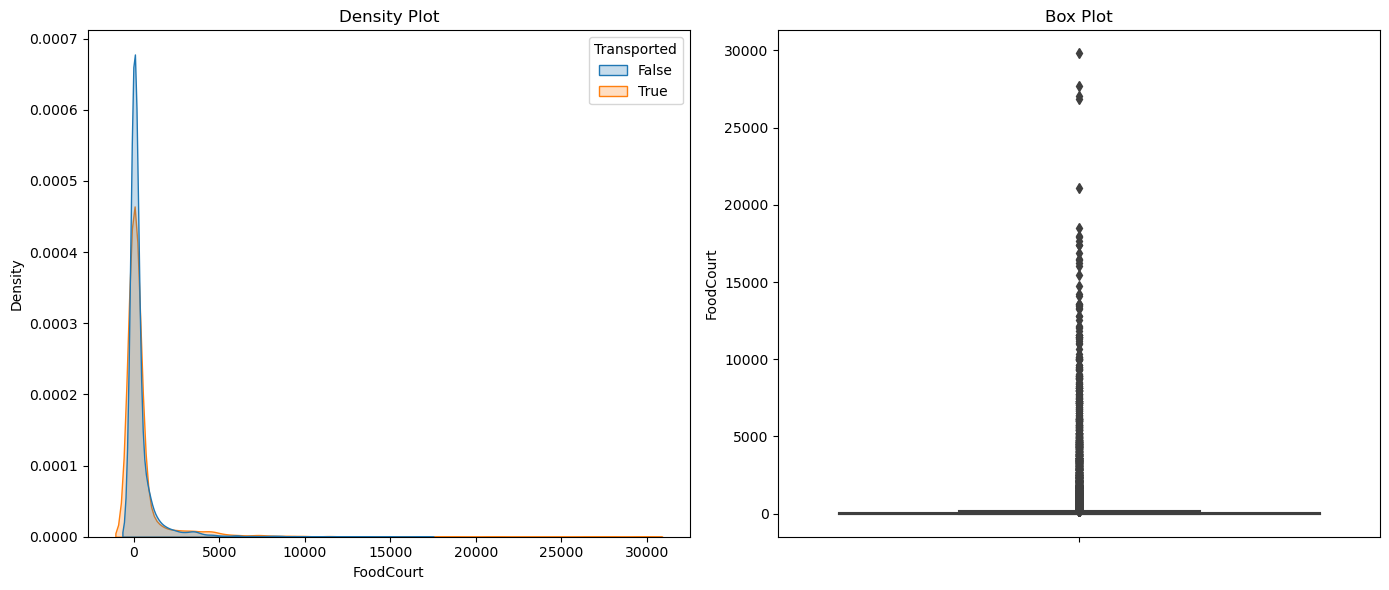

In [83]:
explore_continuous_feature("FoodCourt")

Exploring SHOPPINGMALL...
mean      173.729169
std       604.696458
min         0.000000
max     23492.000000
Name: ShoppingMall, dtype: float64
Mode of ShoppingMall: 0.0
Correlation with Transported: 0.010
Transportation Rate for Passengers Whose ShoppingMall is ABOVE the Average Age of Passengers: 0.406
Transportation Rate for Passengers Whose ShoppingMall is BELOW the Average Age of Passengers: 0.523


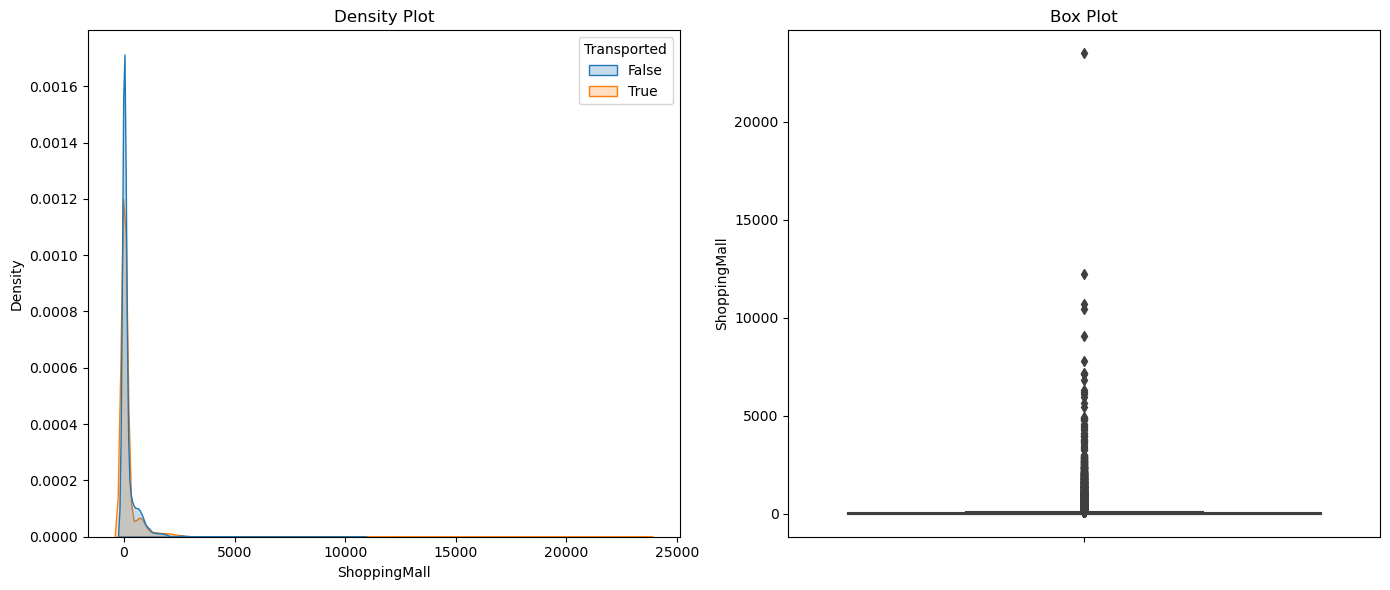

In [84]:
explore_continuous_feature("ShoppingMall")

Exploring SPA...
mean      311.138778
std      1136.705535
min         0.000000
max     22408.000000
Name: Spa, dtype: float64
Mode of Spa: 0.0
Correlation with Transported: -0.221
Transportation Rate for Passengers Whose Spa is ABOVE the Average Age of Passengers: 0.166
Transportation Rate for Passengers Whose Spa is BELOW the Average Age of Passengers: 0.572


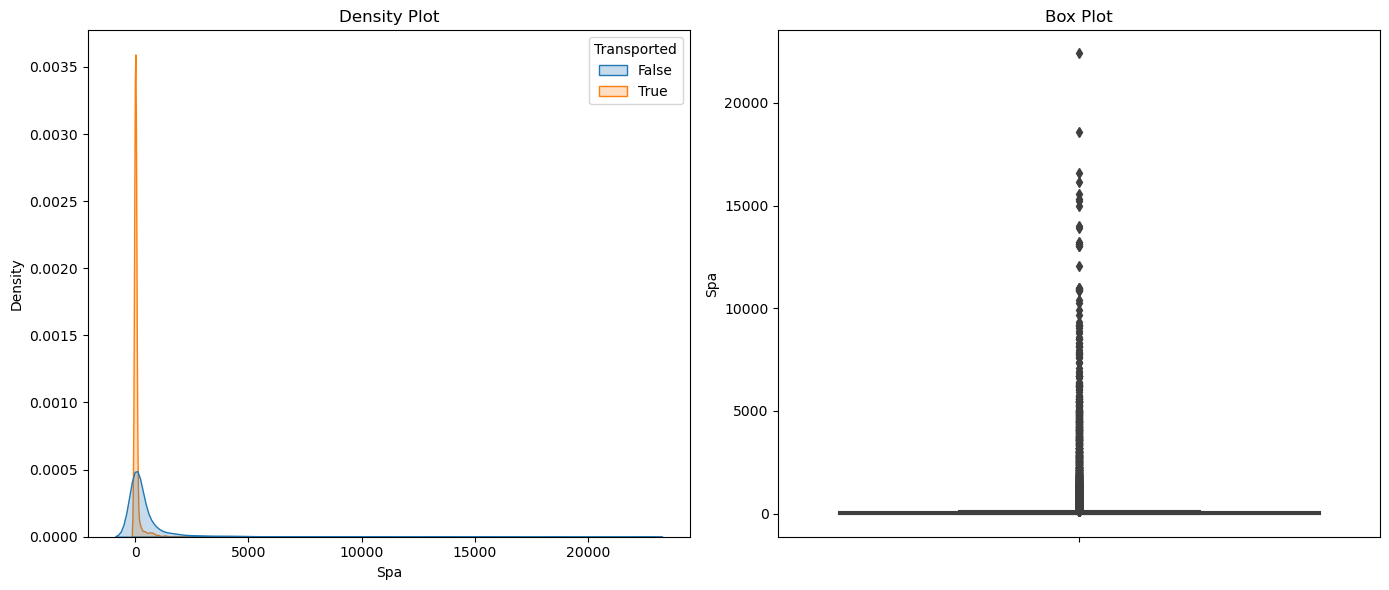

In [85]:
explore_continuous_feature("Spa")

Exploring VRDECK...
mean      304.854791
std      1145.717189
min         0.000000
max     24133.000000
Name: VRDeck, dtype: float64
Mode of VRDeck: 0.0
Correlation with Transported: -0.207
Transportation Rate for Passengers Whose VRDeck is ABOVE the Average Age of Passengers: 0.201
Transportation Rate for Passengers Whose VRDeck is BELOW the Average Age of Passengers: 0.565


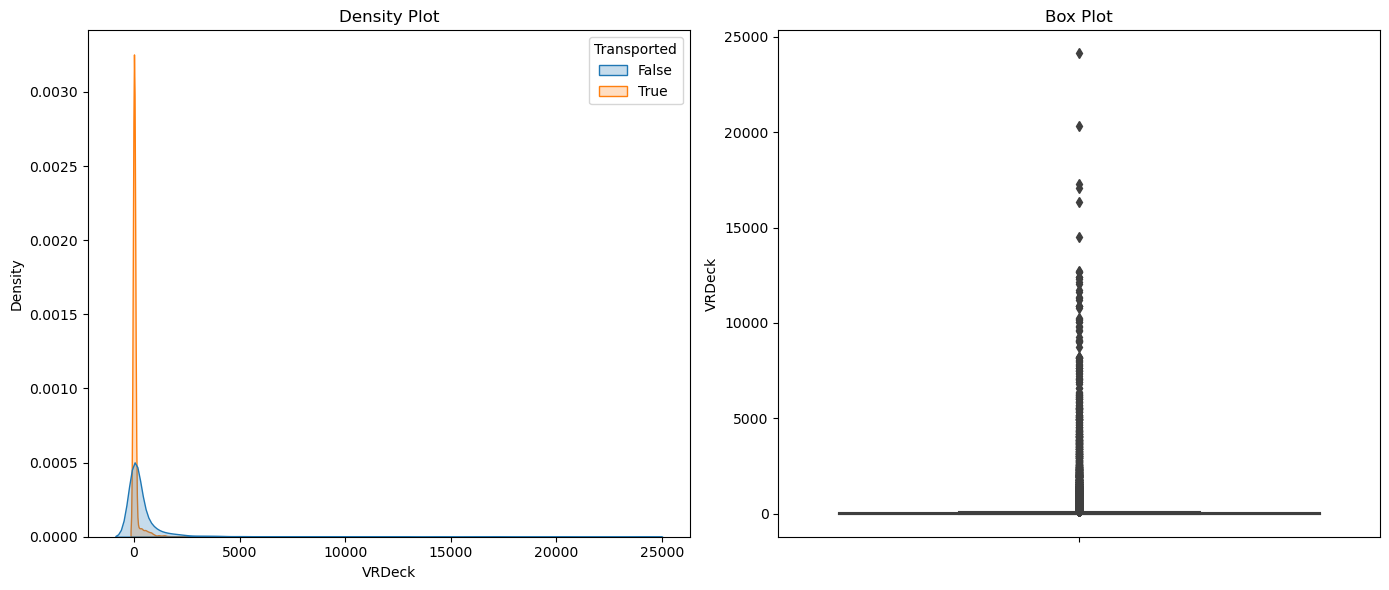

In [86]:
explore_continuous_feature("VRDeck")

# 3) Data Preparation

## 3.1) Basic Cleaning

In [87]:
# Droping Irrelavant Columns
drop_col = df[["PassengerId","Name","Cabin"]]
df = df.drop(drop_col,axis=1)

In [88]:
# Checking Duplicates
df.duplicated().sum()

2266

## 3.2) Null Values Handling

In [89]:
# Checking Null Values
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [90]:
def impute_categorical(df, columns, target='Transported'):
    for col in columns:
        # Calculating mode for each target category
        mode_df = df.groupby(target)[col].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
        
        # Filling missing values with Mode
        for target_value in df[target].unique():
            condition = (df[target] == target_value) & (df[col].isnull())
            df.loc[condition, col] = mode_df[target_value]
    return df

In [91]:
def impute_numerical(df, columns, target='Transported'):
    for col in columns:
        # Calculating mean for each target category
        mean_df = df.groupby(target)[col].mean()
        
        # Fill missing values with Mean
        for target_value in df[target].unique():
            condition = (df[target] == target_value) & (df[col].isnull())
            df.loc[condition, col] = mean_df[target_value]
    return df

In [92]:
# Columns in which Null values are present
categorical_columns = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Imputing Null Values
df = impute_categorical(df, categorical_columns)
df = impute_numerical(df, numerical_columns)

In [93]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## 3.3) Encoding

In [94]:
# Encoding True False Features
true_false_mapper = {True: 1, False:0}

df.CryoSleep = df.CryoSleep.map(true_false_mapper)
df.VIP = df.VIP.map(true_false_mapper)

In [95]:
# Encoding Nominal Features with OneHot Encoding
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(df[["HomePlanet","Destination"]])

res = one_hot_encoder.transform(df[["HomePlanet","Destination"]]).toarray()
df[one_hot_encoder.get_feature_names_out()] = res

In [96]:
# Droping Original columns after encoding
df.drop(["HomePlanet","Destination"], axis=1, inplace=True)

## 3.4) Scaling

In [97]:
# Applying MinMax Scaler
scaler = MinMaxScaler(feature_range=(0, 5))

# Storing columns in variable
num_cols = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
scaler.fit(df[num_cols])
df[num_cols] = scaler.transform(df[num_cols])

In [100]:
# Assigning columns to x and y
x = df.drop("Transported",axis=1)
y = df['Transported']

# Splitting Data to Train and Test Part
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# 4) ML Modeling

## 4.1) Experimenting with Multiple Models

In [104]:
# Storing Created models in List
models = [
    SVC(),
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    HistGradientBoostingClassifier(),
    MultinomialNB()
]

+++++++++++++++ SVC +++++++++++++++
Training Score :  0.7920621225194133
Testing  Score :  0.7711328349626222
Accuracy :  0.7711328349626222
F1 :  0.7710400887096346
Reacll :  0.7713263967152917
Precision :  0.7719306967445658
Classification Report....
               precision    recall  f1-score   support

       False       0.76      0.80      0.78       863
        True       0.79      0.75      0.77       876

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



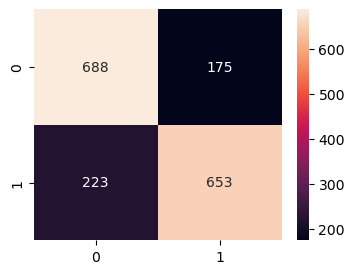

++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++ LogisticRegression +++++++++++++++
Training Score :  0.7924935289042278
Testing  Score :  0.7878090856814262
Accuracy :  0.7878090856814262
F1 :  0.787809085681426
Reacll :  0.7878531140705938
Precision :  0.7878531140705938
Classification Report....
               precision    recall  f1-score   support

       False       0.78      0.79      0.79       863
        True       0.79      0.78      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



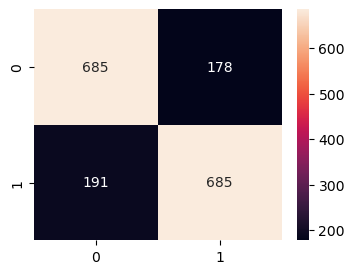

++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++ KNeighborsClassifier +++++++++++++++
Training Score :  0.8321829163071613
Testing  Score :  0.7596319723979299
Accuracy :  0.7596319723979299
F1 :  0.759628077638363
Reacll :  0.7596443329788303
Precision :  0.7596299088660503
Classification Report....
               precision    recall  f1-score   support

       False       0.76      0.76      0.76       863
        True       0.76      0.76      0.76       876

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



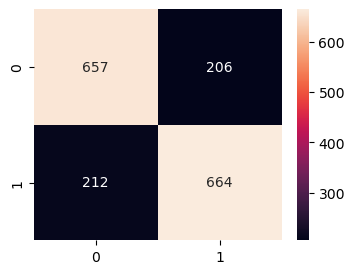

++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++ DecisionTreeClassifier +++++++++++++++
Training Score :  0.9437733678458441
Testing  Score :  0.7515813686026452
Accuracy :  0.7515813686026452
F1 :  0.7513326289532012
Reacll :  0.7513869267766156
Precision :  0.7521574200122598
Classification Report....
               precision    recall  f1-score   support

       False       0.76      0.73      0.74       863
        True       0.74      0.78      0.76       876

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739



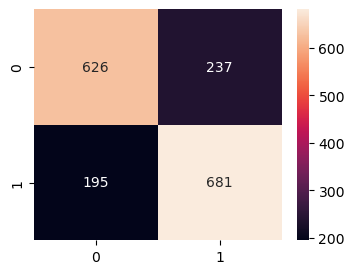

++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++ RandomForestClassifier +++++++++++++++
Training Score :  0.9437733678458441
Testing  Score :  0.8016101207590569
Accuracy :  0.8016101207590569
F1 :  0.8016090711136022
Reacll :  0.8016721164886216
Precision :  0.8016992538893004
Classification Report....
               precision    recall  f1-score   support

       False       0.79      0.81      0.80       863
        True       0.81      0.79      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



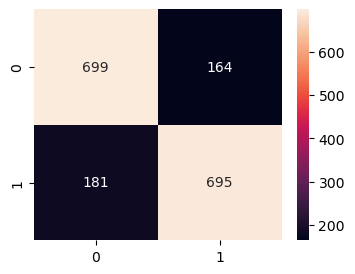

++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++ HistGradientBoostingClassifier +++++++++++++++
Training Score :  0.8731665228645384
Testing  Score :  0.8062104657849338
Accuracy :  0.8062104657849338
F1 :  0.8060234244283324
Reacll :  0.8060233760324238
Precision :  0.8069222339852529
Classification Report....
               precision    recall  f1-score   support

       False       0.82      0.78      0.80       863
        True       0.79      0.83      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



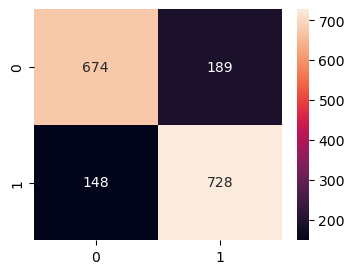

++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++ MultinomialNB +++++++++++++++
Training Score :  0.769772792637331
Testing  Score :  0.7602070155261644
Accuracy :  0.7602070155261644
F1 :  0.7593462991632112
Reacll :  0.7606965983587042
Precision :  0.7649612809550698
Classification Report....
               precision    recall  f1-score   support

       False       0.73      0.83      0.77       863
        True       0.80      0.70      0.74       876

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.77      0.76      0.76      1739



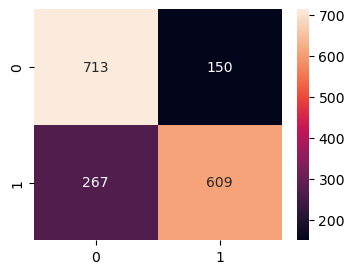

++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++


In [105]:
models_results = []

# Iterating, Training and Evaluting Models
for mdl in models:
    
    name = type(mdl).__name__
    
    # Training model
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    
    # Scores
    train_sco = mdl.score(x_train, y_train)
    test_sco = mdl.score(x_test, y_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Precision
    precision = precision_score(y_test, y_pred, average="macro")

    # Recall
    recall = recall_score(y_test, y_pred, average="macro")

    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average="macro")

    # Classification Report
    report = classification_report(y_test, y_pred)
    
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    
    # Storing Results
    res = []
    res.append(name)
    res.append(train_sco)
    res.append(test_sco)
    res.append(accuracy)
    res.append(precision)
    res.append(recall)
    res.append(f1_sco)
    models_results.append(res)
    
    # Printing Results
    print("+"*15, name, "+"*15)
    print("Training Score : ", train_sco)
    print("Testing  Score : ", test_sco)
    print('Accuracy : ', accuracy)
    print('F1 : ', f1_sco)
    print('Reacll : ', recall)
    print('Precision : ', precision)
    print('Classification Report....\n', report)
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_mat, annot=True, fmt="d")
    plt.show()
    
    print("++++++++++++++++++++++++++++++++++++++++++++++++")
    print("++++++++++++++++++++++++++++++++++++++++++++++++")    

In [106]:
model_results_df = pd.DataFrame(models_results, columns=["Model", "Training Score", "Testing Score", "Accuracy", "Precision", "Recall", "F1 Score"])
model_results_df

,Model,Training Score,Testing Score,Accuracy,Precision,Recall,F1 Score
0,SVC,0.792062,0.771133,0.771133,0.771931,0.771326,0.771040
1,LogisticRegression,0.792494,0.787809,0.787809,0.787853,0.787853,0.787809
2,KNeighborsClassifier,0.832183,0.759632,0.759632,0.759630,0.759644,0.759628
3,DecisionTreeClassifier,0.943773,0.751581,0.751581,0.752157,0.751387,0.751333
4,RandomForestClassifier,0.943773,0.801610,0.801610,0.801699,0.801672,0.801609
5,HistGradientBoostingClassifier,0.873167,0.806210,0.806210,0.806922,0.806023,0.806023
6,MultinomialNB,0.769773,0.760207,0.760207,0.764961,0.760697,0.759346


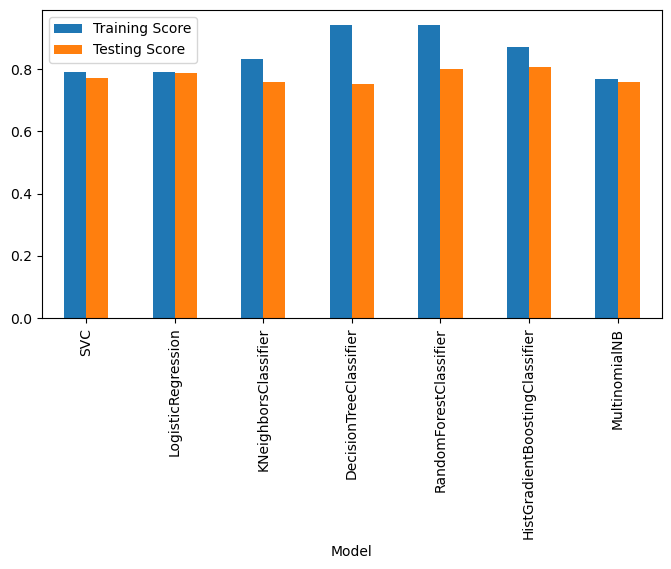

In [107]:
model_results_df.set_index("Model")[["Training Score", "Testing Score"]].plot(kind="bar", figsize=(8, 4))
plt.show()

0    0.020929
1    0.004684
2    0.072551
3    0.192192
4    0.142163
5    0.066956
6    0.009566
Name: Overfitness, dtype: float64


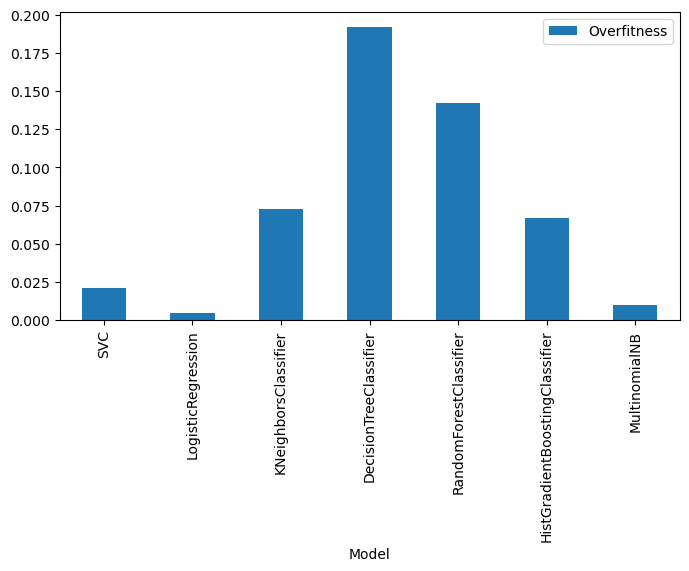

In [108]:
# Checking Overfitness
model_results_df["Overfitness"] = model_results_df["Training Score"] - model_results_df["Testing Score"]
print(model_results_df["Overfitness"])

model_results_df.set_index("Model")[["Overfitness"]].plot(kind="bar", figsize=(8, 4))
plt.show()

HistGradient has the good accuracy and low overfitness so this is the best final model.

## 4.2) Final Model

Training Score :  0.8731665228645384
Testing  Score :  0.8062104657849338
Accuracy :  0.8062104657849338
F1 :  0.8060234244283324
Reacll :  0.8060233760324238
Precision :  0.8069222339852529
Classification Report....
               precision    recall  f1-score   support

       False       0.82      0.78      0.80       863
        True       0.79      0.83      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



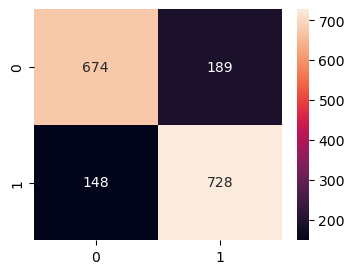

++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++


In [109]:
model = HistGradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
    
# Scores
train_sco = model.score(x_train, y_train)
test_sco = model.score(x_test, y_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average="macro")

# Recall
recall = recall_score(y_test, y_pred, average="macro")

# F1 Score
f1_sco = f1_score(y_test, y_pred, average="macro")

# Classification Report
report = classification_report(y_test, y_pred)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)


# Printing Results
print("Training Score : ", train_sco)
print("Testing  Score : ", test_sco)
print('Accuracy : ', accuracy)
print('F1 : ', f1_sco)
print('Reacll : ', recall)
print('Precision : ', precision)
print('Classification Report....\n', report)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.show()

print("++++++++++++++++++++++++++++++++++++++++++++++++")
print("++++++++++++++++++++++++++++++++++++++++++++++++")    